### Perform standard imports and load the dataset
For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [41]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [42]:
df.dropna(inplace=True)

In [43]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [44]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [45]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Simple Exponential Smoothing

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [50]:
# model=SimpleExpSmoothing(df['Thousands of Passengers'])
# fitted_model=model.fit(smoothing_level=alpha, optimized=False)
# df['SES12']=fitted_model.fittedvalues

In [52]:
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Month'>

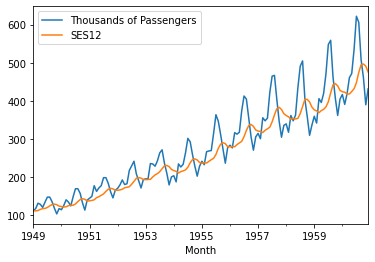

In [54]:
df.plot()

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df['DESadd12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues
df

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,SES12,DESadd12
Month,,,
1949-01-01,112,112.000000,114.640872
1949-02-01,118,112.000000,114.726005
1949-03-01,132,112.923077,120.710575
1949-04-01,129,115.857988,134.718393
1949-05-01,121,117.879836,131.778257
...,...,...,...
1960-08-01,606,474.698368,624.918993
1960-09-01,508,494.898619,609.348558
1960-10-01,461,496.914216,511.329993


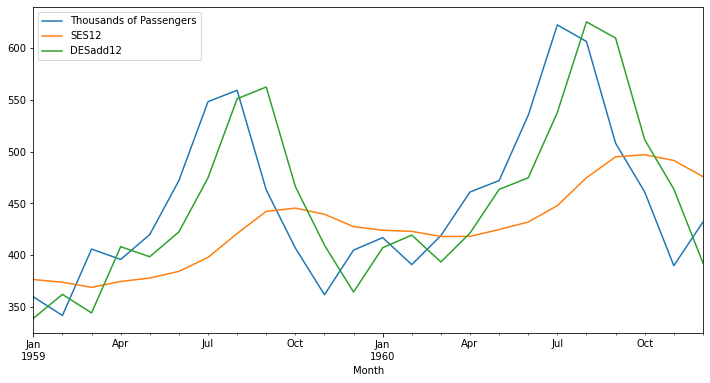

In [62]:
df.iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

In [63]:
df['DESmul12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues
df

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,SES12,DESadd12,DESmul12
Month,,,,
1949-01-01,112,112.000000,114.640872,111.204583
1949-02-01,118,112.000000,114.726005,109.686554
1949-03-01,132,112.923077,120.710575,115.763768
1949-04-01,129,115.857988,134.718393,129.989659
1949-05-01,121,117.879836,131.778257,127.152901
...,...,...,...,...
1960-08-01,606,474.698368,624.918993,635.428056
1960-09-01,508,494.898619,609.348558,619.161388
1960-10-01,461,496.914216,511.329993,516.979445


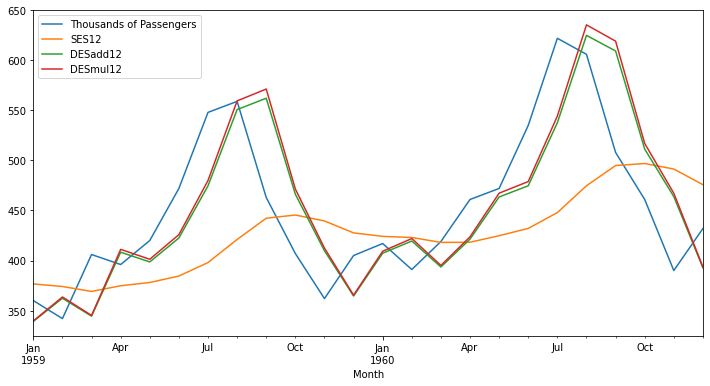

In [64]:
df.iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

In [66]:
df['TESadd12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add').fit().fittedvalues
df

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,SES12,DESadd12,DESmul12,TESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,114.640872,111.204583,111.592276,112.001610
1949-02-01,118,112.000000,114.726005,109.686554,118.842431,120.167659
1949-03-01,132,112.923077,120.710575,115.763768,133.332953,134.700696
1949-04-01,129,115.857988,134.718393,129.989659,127.897508,131.381200
1949-05-01,121,117.879836,131.778257,127.152901,120.978282,124.633479
...,...,...,...,...,...,...
1960-08-01,606,474.698368,624.918993,635.428056,629.402412,608.233265
1960-09-01,508,494.898619,609.348558,619.161388,512.001109,507.658129
1960-10-01,461,496.914216,511.329993,516.979445,448.035721,451.326595


In [65]:
df['TESmul12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul').fit().fittedvalues
df

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,SES12,DESadd12,DESmul12,TESmul12
Month,,,,,
1949-01-01,112,112.000000,114.640872,111.204583,111.592276
1949-02-01,118,112.000000,114.726005,109.686554,118.842431
1949-03-01,132,112.923077,120.710575,115.763768,133.332953
1949-04-01,129,115.857988,134.718393,129.989659,127.897508
1949-05-01,121,117.879836,131.778257,127.152901,120.978282
...,...,...,...,...,...
1960-08-01,606,474.698368,624.918993,635.428056,629.402412
1960-09-01,508,494.898619,609.348558,619.161388,512.001109
1960-10-01,461,496.914216,511.329993,516.979445,448.035721


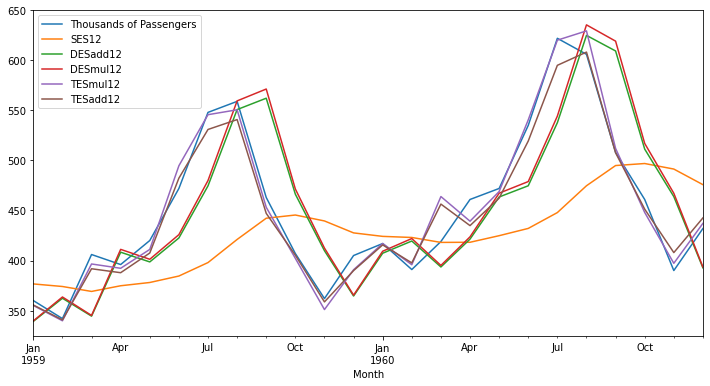

In [67]:
df.iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

In [68]:
df.columns

Index(['Thousands of Passengers', 'SES12', 'DESadd12', 'DESmul12', 'TESmul12',
       'TESadd12'],
      dtype='object')

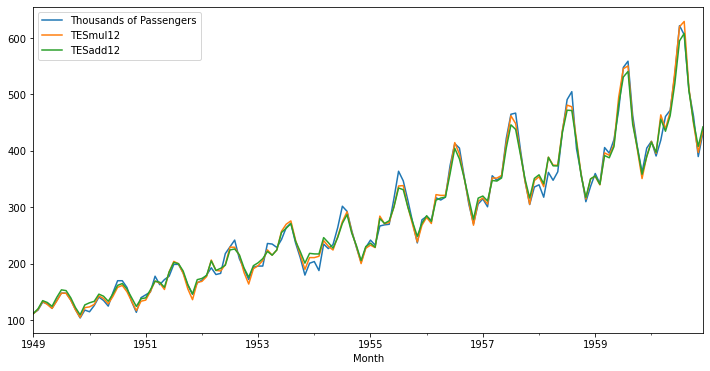

In [69]:
df[['Thousands of Passengers','TESmul12','TESadd12']].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

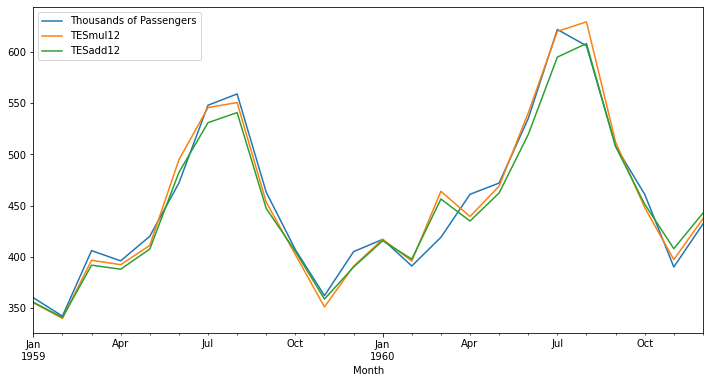

In [72]:
df[['Thousands of Passengers','TESmul12','TESadd12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

# Forecasting

In [73]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [74]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Train Test Split

In [76]:
train_data=df.iloc[:109] # get upto 108
test_data=df.iloc[109:] 

In [81]:
test_data

,Thousands of Passengers
Month,
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [78]:
144-109

35

In [77]:
fitted_model= ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [79]:
test_predictions= fitted_model. forecast(35).rename('HW Forecast')

In [80]:
test_predictions

1958-02-01    339.142997
1958-03-01    399.281707
1958-04-01    394.233601
1958-05-01    402.545257
1958-06-01    473.128827
1958-07-01    521.795478
1958-08-01    514.513898
1958-09-01    446.217095
1958-10-01    385.431161
1958-11-01    339.645268
1958-12-01    381.455794
1959-01-01    401.210352
1959-02-01    387.159316
1959-03-01    455.812544
1959-04-01    450.049721
1959-05-01    459.538153
1959-06-01    540.115039
1959-07-01    595.671979
1959-08-01    587.359464
1959-09-01    509.393108
1959-10-01    440.001019
1959-11-01    387.732699
1959-12-01    435.462816
1960-01-01    458.014250
1960-02-01    441.973849
1960-03-01    520.347094
1960-04-01    513.768362
1960-05-01    524.600178
1960-06-01    616.585248
1960-07-01    680.008014
1960-08-01    670.518602
1960-09-01    581.513665
1960-10-01    502.296952
1960-11-01    442.628413
1960-12-01    497.116223
Freq: MS, Name: HW Forecast, dtype: float64

<AxesSubplot:xlabel='Month'>

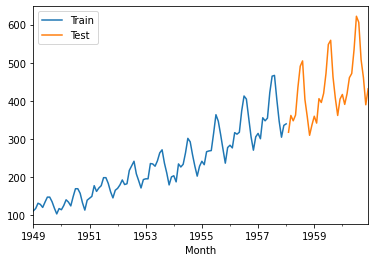

In [82]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')

<AxesSubplot:xlabel='Month'>

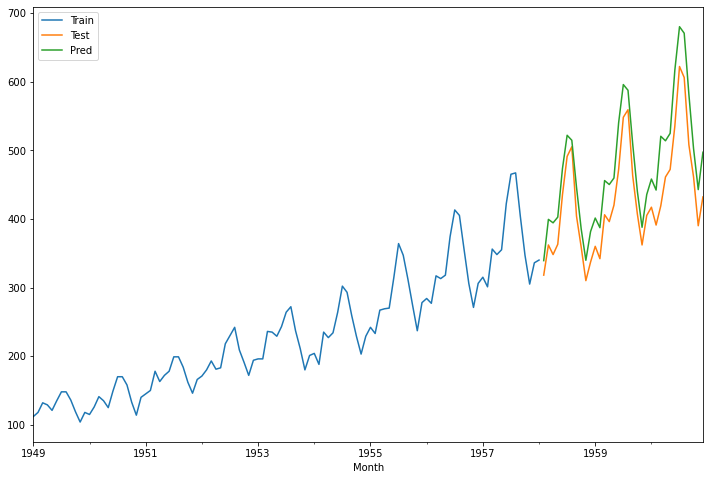

In [84]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))

test_predictions.plot(legend=True, label='Pred')

<AxesSubplot:xlabel='Month'>

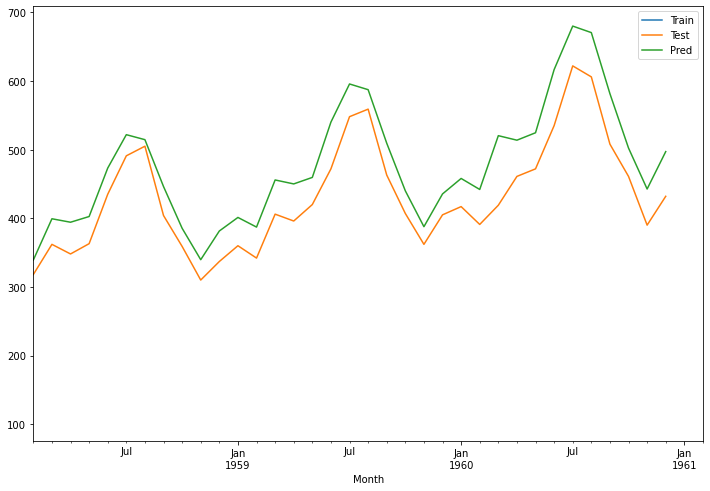

In [85]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))

test_predictions.plot(legend=True, label='Pred', xlim=['1958-02-01','1961-02-01'])

# Evaluation Metrics

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [88]:
mean_absolute_error(test_data, test_predictions)

46.0076612293776

# Forecasting

In [89]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [90]:
forecast_pred=final_model.forecast(36)



<AxesSubplot:xlabel='Month'>

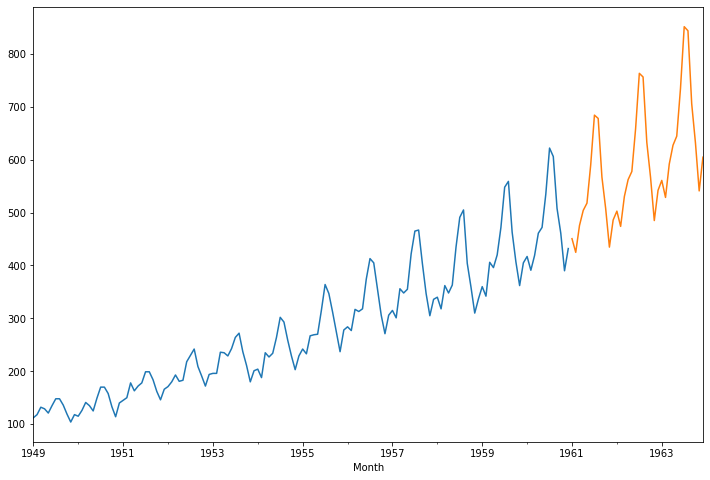

In [91]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_pred.plot()

In [93]:
len(forecast_pred)

36

# Running an ETS decomposition on the data to take out the components

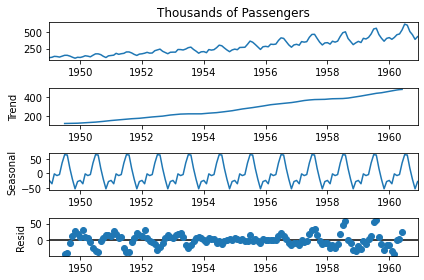

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
result = seasonal_decompose(df['Thousands of Passengers'], model='add')
result.plot();

# Checking for Stationarity in the data

In [102]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [103]:
adfuller_test(df['Thousands of Passengers'])


ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Checking for the order of p and q ()

This confirms that we reached stationarity after the first difference.
### Run the ACF and PACF plots
A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>
Alternatively, we can compare the stepwise <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike Information Criterion (AIC)</a> values across a set of different (p,q) combinations to choose the best combination.

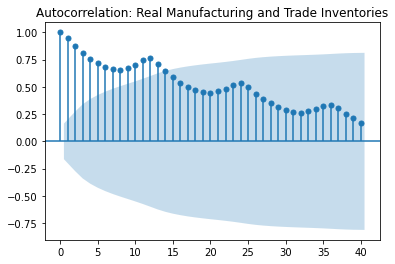

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df['Thousands of Passengers'],title=title,lags=lags);

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


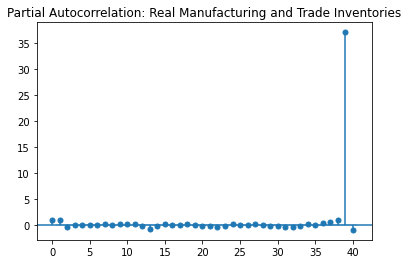

In [119]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df['Thousands of Passengers'],title=title,lags=lags);

*** It looks like understanding the p and q value from ACF and PACF plot is very difficult to get visually

** what about order of d??

# Checking for the order of d (Order of differencing)

## Creating 1st Order differencing
*** Why the error??
**** Is has some nan values

In [106]:
from statsmodels.tsa.statespace.tools import diff
df['Thousands of Passengers_diff1'] = diff(df['Thousands of Passengers'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adfuller_test(df['Thousands of Passengers_diff1']) # because it has a nan value

MissingDataError: exog contains inf or nans

In [107]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''): # same as before , the only advantage is it handles the nan values
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [109]:
from statsmodels.tsa.statespace.tools import diff
df['Thousands of Passengers_diff1'] = diff(df['Thousands of Passengers'],k_diff=12) # change the order of differencing and check for stationarity

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df['Thousands of Passengers_diff1']) # because it has a nan value

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.634342e+01
p-value                 2.980504e-29
# lags used             1.300000e+01
# observations          1.180000e+02
critical value (1%)    -3.487022e+00
critical value (5%)    -2.886363e+00
critical value (10%)   -2.580009e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Using Auto Arima to dynalically get the order values

In [113]:
from pmdarima import auto_arima # for determining ARIMA orders

stepwise_fit = auto_arima(df['Thousands of Passengers'], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1373.560, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1384.053, Time=0.20 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1375.353, Time=0.28 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1365.825, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0]          
Total fit time: 8.168 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sat, 12 Nov 2022   AIC                           1365.825
Time:                        14:43:12   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1724     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Building ARIMA model from the orders of p,d,q obtained from the ACF and PACF plot

In [121]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train_data['Thousands of Passengers'],order=(4,1,3)) #do something so that I can get it dynamically
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Thousands of Passengers   No. Observations:                  108
Model:                        ARIMA(4, 1, 3)   Log Likelihood                -470.671
Method:                              css-mle   S.D. of innovations             18.020
Date:                       Sat, 12 Nov 2022   AIC                            959.342
Time:                               15:12:47   BIC                            983.482
Sample:                           02-01-1949   HQIC                           969.130
                                - 01-01-1958                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.4859      0.140     17.732      0.000       2.211       2.761
ar.L1.D.Thousands of Passengers     0.2701      0.079      3.424      0.001       0.115       0.425
ar.L2.D.Thousands of Passengers    -0.4011      0.056     -7.143      0.000      -0.511      -0.291
ar.L3.D.Thousands of Passengers     0.6081      0.060     10.120      0.000       0.490       0.726
ar.L4.D.Thousands of Passengers    -0.5995      0.075     -7.972      0.000      -0.747      -0.452
ma.L1.D.Thousands of Passengers    -0.1363      0.081     -1.680      0.093      -0.295       0.023
ma.L2.D.Thousands of Passengers     0.1363      0.079      1.723      0.085      -0.019       0.291
ma.L3.D.Thousands of Passengers    -1.0000      0.076    -13.164      0.000      -1.149      -0.851
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4947           -0.8845j            1.0134           -0.3312
AR.2           -0.4947           +0.8845j            1.0134            0.3312
AR.3            1.0018           -0.7878j            1.2745           -0.1061
AR.4            1.0018           +0.7878j            1.2745            0.1061
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4318           -0.9019j            1.0000           -0.3211
MA.3           -0.4318           +0.9019j            1.0000            0.3211
-----------------------------------------------------------------------------
"""

In [124]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_Arima = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(4,1,3) Predictions')




In [125]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions_Arima[i]:<11.10}, expected={test_data['Thousands of Passengers'][i]}")

predicted=345.5485594, expected=318
predicted=374.5070727, expected=362
predicted=384.4936696, expected=348
predicted=379.3433588, expected=363
predicted=391.0193113, expected=435
predicted=387.7418291, expected=491
predicted=375.8455839, expected=505
predicted=386.9236586, expected=404
predicted=388.4850203, expected=359
predicted=381.9849919, expected=310
predicted=396.2604345, expected=337
predicted=399.822002 , expected=360
predicted=392.9604809, expected=342
predicted=405.0454587, expected=406
predicted=407.4598594, expected=396
predicted=399.748109 , expected=420
predicted=410.9482669, expected=472
predicted=414.0801956, expected=548
predicted=407.0878179, expected=559
predicted=418.1661828, expected=463
predicted=421.9434161, expected=407
predicted=415.181488 , expected=362
predicted=425.5580084, expected=405
predicted=429.5186268, expected=417
predicted=422.8410066, expected=391
predicted=432.6018458, expected=419
predicted=436.894578 , expected=461
predicted=430.4949237, expec

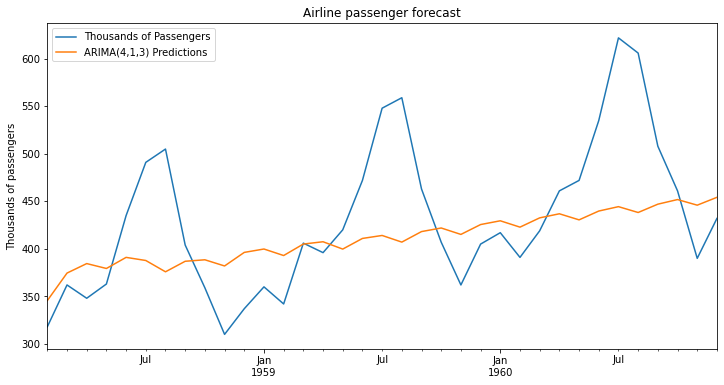

In [128]:
# Plot predictions against known values
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = 'Airline passenger forecast'
ylabel='Thousands of passengers'
xlabel='' # we don't really need a label here

ax = test_data['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions_Arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);